<a href="https://colab.research.google.com/github/Gowtham933/Supply-chain-Data-Analysis-Project/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis Testing
Hypothesis testing is a statastical analysis test, which putting the assumptions about a population and to prove the assumptions is correct or wrong.

**Two Hypothesis condition**
- Null Hypothesis (H0): This hypothesis states that there is no effect or difference, and it is the hypothesis you attempt to reject with your test.
- Alternative Hypothesis (H1 or Ha): This hypothesis is what you might believe to be true or hope to prove true. It is usually considered the opposite of the null hypothesis.

**Choose the Significance Level (α)**

The significance level, often denoted by alpha (α), is the probability of rejecting the null hypothesis when it is true. Common choices for α are 0.05 (5%), 0.01 (1%), and 0.10 (10%).

Hypothesis Testing Formula

Z = ( x̅ – μ0 ) / (σ /√n)

    Here, x̅ is the sample mean,
    μ0 is the population mean,
    σ is the standard deviation,
    n is the sample size.

In [70]:
#importing necessary library
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
#Load data CSV file into the pandas data frame
data= pd.read_csv("/content/supply_chain_data.csv")
data.head() # to understnd the data look for first few rows of the datasets

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [72]:
(data.columns)

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [73]:
# prompt: Count SUK

Sample_count = data['SKU'].value_counts()
Sample_count


SKU
SKU0     1
SKU63    1
SKU73    1
SKU72    1
SKU71    1
        ..
SKU30    1
SKU29    1
SKU28    1
SKU27    1
SKU99    1
Name: count, Length: 100, dtype: int64

## T- Test
A t-test is a test usded for hypothesis testing in statistics. It determine if there is a statistically significant differnece between the means of two varaibles.

We have three shipping carriers just for example performing T-test between two of them.(Used: **"Independent samples t-test"**)

- Step 1:(Formulate Hypotheses)
 - Null hypothesis (H0​): The mean shipping times for the two carriers A and B are equal.
 - Alternative hypothesis (H1​): The mean shipping times for the two carriers A and B are different.
- Step 2:( Selecting two carrier out of three by grouping)
- Step 3: (Performing the T-test)
 - Idependedent samples to compare means of the two selcted carriers.





In [74]:
# Group the Shipping carriers A and B by shipping timings

carrier_a = data.groupby('Shipping carriers')['Shipping times'].agg(list)[0]
carrier_b = data.groupby('Shipping carriers')['Shipping times'].agg(list)[1]


In [75]:
# Perform the t-test to prove
t_statistic, p_value = stats.ttest_ind(carrier_a, carrier_b)

In [76]:
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

T-statistic: 1.245958311135371, P-value: 0.2169936688645812


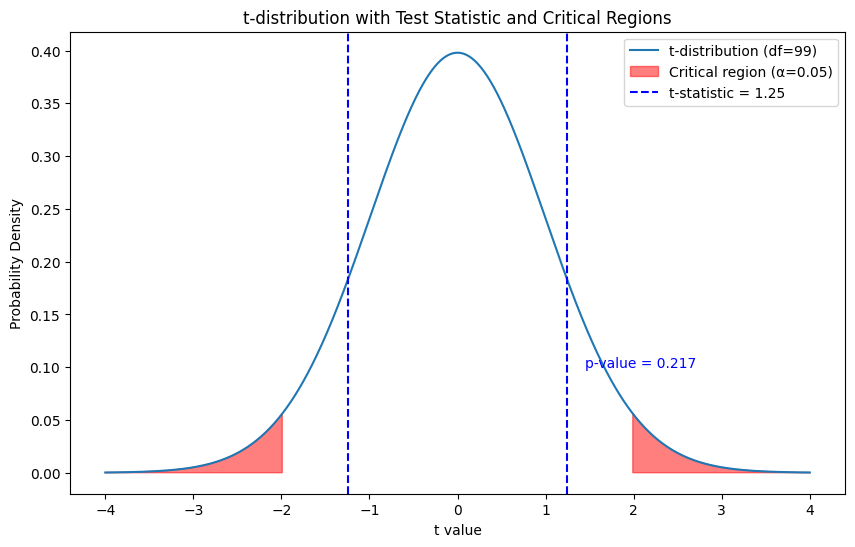

In [77]:
# Parameters
t_statistic = 1.245958311135371
p_value = 0.2169936688645812
alpha = 0.05
# independent sample t- test is used so dgree of freedom is choosen by n-1 sample. n represnt number of samples
df = 100 - 1

# Generate x values
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=99)')

# Critical value for two-tailed test
critical_value = stats.t.ppf(1 - alpha / 2, df)

# Shade critical regions
plt.fill_between(x, 0, y, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.5, label='Critical region (α=0.05)')

# Mark test statistic
plt.axvline(t_statistic, color='blue', linestyle='--', label=f't-statistic = {t_statistic:.2f}')
plt.axvline(-t_statistic, color='blue', linestyle='--')

# Annotations
plt.text(t_statistic + 0.2, 0.1, f'p-value = {p_value:.3f}', color='blue')

# Labels and title
plt.title('t-distribution with Test Statistic and Critical Regions')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()

# Show plot
plt.show()

Here assuming the common significance level of 0.05 by comparing the **P-value (0.217) > α (0.05)** -->  Since the p-value is greater than the significance level, you do **not reject the null hypothesis**.

###Conclusion:

Based on the t-statistic of 1.246 and the p-value of 0.217, there is not enough evidence to reject the null hypothesis at the 0.05 significance level. This suggests that the observed data is consistent with the null hypothesis, and any observed difference is likely due to random chance rather than a true effect.


In [78]:
# prompt: mean carrier_a

carrier_a_mean = np.mean(carrier_a)
print(carrier_a_mean)
carrier_b_mean = np.mean(carrier_b)
print(carrier_b_mean)


6.142857142857143
5.3023255813953485


Possible Reasons for Not Rejecting the Null Hypothesis:

  - Small Sample Size: If the sample size is small, the test might not have enough power to detect a difference even if the means are different.

  - Variability in Data: High variability within each carrier’s shipping times can lead to a higher standard error, which makes it harder to detect a significant difference.

  - Significance Level (α): If the chosen significance level is too stringent (e.g., α = 0.01), it might be harder to reject the null hypothesis.

  - Actual Difference: The difference in means (6.1 vs. 5.3) might not be large enough to be statistically significant given the variability in the data.

##Analysis of Variance(ANOVA)

As we have more then 2 groups of varaibles conducting, typically we are using an analysis of variance(ANOVA) which is more appropriate to determine if there any statistically significant differences in the means of the groups.

- Step 1:(Formulate Hypotheses)
 - Null hypothesis (H0​): The mean shipping times are equal across all three carriers.
    
       H0:μ1=μ2=μ3H0​:μ1​=μ2​=μ3​

 - Alternative Hypothesis (H₁): At least one of the mean shipping times is different.

   H1​:At least one μi​ is different (where μi​ denotes the mean shipping time for carrier i).

- Step 2: (group data)
   - Obtain shipping time data for the same   set of shipments handled by three different carriers. Ideally, the shipments should be randomly assigned to each carrier to avoid bias.

- Step 3: (Calculate Descriptive Statistics)
 - Calculate the sample mean shipping times (xˉ1,xˉ2,xˉ3xˉ1​,xˉ2​,xˉ3​), sample standard deviations, and sample sizes (n1,n2,n3n1​,n2​,n3​) for each carrier.
- Step 4: (Perform ANOVA Test)
 - The ANOVA test will provide an F-statistic and a p-value.

In [79]:
# Group the Shipping carriers A, B and C by shipping timings

carrier_a_times = data.groupby('Shipping carriers')['Shipping times'].agg(list)[0]
carrier_b_times= data.groupby('Shipping carriers')['Shipping times'].agg(list)[1]
carrier_c_times = data.groupby('Shipping carriers')['Shipping times'].agg(list)[2]

In [80]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(carrier_a_times, carrier_b_times, carrier_c_times)

# Print results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in shipping times between at least one pair of carriers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in shipping times between the carriers.")

F-statistic: 1.0305
P-value: 0.3607
Fail to reject null hypothesis: There is no significant difference in shipping times between the carriers.


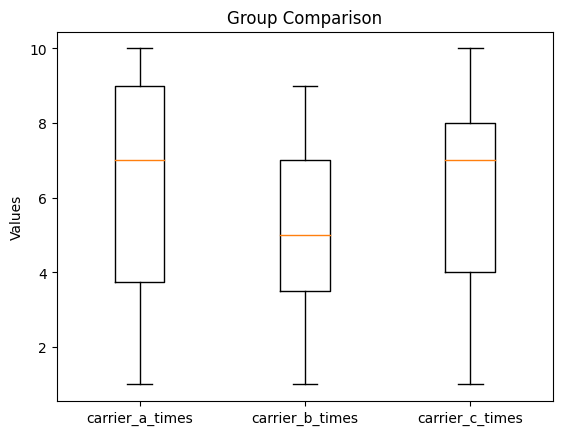

In [82]:

# Create a box plot to visualize the group differences
data1 = [carrier_a_times, carrier_b_times, carrier_c_times]
plt.boxplot(data1, labels=['carrier_a_times', 'carrier_b_times', 'carrier_c_times'])
plt.title('Group Comparison')
plt.ylabel('Values')
plt.show()


Interpretation:

 1. F-statistic (1.0305) -->
  - The F-statistic is a ratio of the variance explained by the model to the variance unexplained by the model. A higher F-statistic indicates that the model explains a significant portion of the variance in the dependent variable.
 2. P-value (0.3607): -->
   - The p-value is the probability of obtaining an F-statistic at least as extreme as the one observed, under the null hypothesis. The null hypothesis usually states that all group means are equal (in the context of ANOVA) or that the model does not explain any variance (in the context of regression).

Conclusion:

- A p-value of 0.3607 is quite high, indicating that there is a 36.07% chance that the observed F-statistic (or something more extreme) could occur under the null hypothesis.
- Since this p-value is typically greater than common significance levels (such as 0.05 or 0.01), we fail to reject the null hypothesis.


#Chi-square test
It is a statistical method used to examine the association between categorical variables. It helps determine whether there is a significant relationship between two categorical variables in a contingency table. Here's how you can perform a Chi-square test to evaluate the relationship between categorical data in Python:

Steps involved in Chi-Square Test:

1. Prepare the Data
- Organize your data into a contingency table
2. State the Hypotheses:
- Null Hypothesis (H0): There is no association between the variables (they are independent).
- Alternative Hypothesis (H1): There is an association between the variables (they are not independent).
3. Calculate the Chi-square Statistic:
- Use the formula to compute the Chi-square statistic and p-value.
4. Interpret the Results:
- Compare the p-value with a significance level (typically 0.05) to determine whether to reject the null hypothesis.

In [88]:
#Group the product type PI chart based on customer demography
Customer_demographics_group = data.groupby(['Product type','Customer demographics']).size().unstack().fillna(0)
Customer_demographics_group

Customer demographics,Female,Male,Non-binary,Unknown
Product type,,,,
cosmetics,10,4,5,7
haircare,2,10,7,15
skincare,13,7,11,9


In [106]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(Customer_demographics_group)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
expected

Chi-Square Statistic: 13.082213806873492
P-value: 0.04174880460509854
Degrees of Freedom: 6
Expected Frequencies:


array([[ 6.5 ,  5.46,  5.98,  8.06],
       [ 8.5 ,  7.14,  7.82, 10.54],
       [10.  ,  8.4 ,  9.2 , 12.4 ]])

- **Interpretation**
1.   Statistical Significance
     - The P-value (0.0417) is less than the common significance level of 0.05.
     - This indicates that there is a statistically significant association between the variables at the 5% significance level.
2.   Degrees of Freedom
     - The 6 degrees of freedom suggest that the data is distributed across a table with 3 rows and 4 columns.
3.   Chi-Square Statistic
     - The value of 13.082, combined with the degrees of freedom and the P-value, leads to the rejection of the null hypothesis.
4.   Conclusion:
     - Since the P-value is less than 0.05, we reject the null hypothesis.
     - This means that there is enough evidence to suggest that there is a significant association between the categorical variables in your dataset.


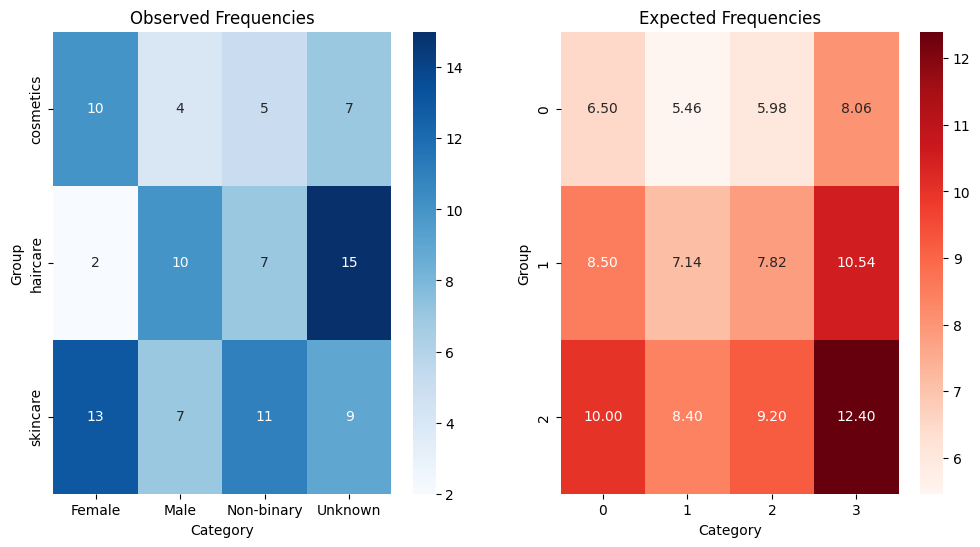

In [92]:
# Plot observed vs. expected frequencies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Observed frequencies
sns.heatmap(Customer_demographics_group, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Observed Frequencies")
ax1.set_xlabel("Category")
ax1.set_ylabel("Group")

# Expected frequencies
sns.heatmap(expected, annot=True, fmt=".2f", cmap="Reds", ax=ax2)
ax2.set_title("Expected Frequencies")
ax2.set_xlabel("Category")
ax2.set_ylabel("Group")

plt.show()# Mosaic Plot